# Homework 4 DSCI510

--- 

 ***GITHUB LINK - https://github.com/dhand33p/USCDSCI510***

What kind of analyses or visualizations did you do? (Similar to Homework 2 Q3,
but now you should answer based on your progress, rather than just your plan). [5
points]



---

**Sources**

https://www.worldometers.info/co2-emissions/co2-emissions-by-country/

https://www.iqair.com/us/world-most-polluted-countries


In [25]:
df = pd.read_csv("co2andpoll.csv")
df_s = df.sort_values(by =  "CO2_emis_2016", ascending = False)
df_f = df_s.head(5)
df_f

df_20 = df_s.head(20)
df_20

,Country,CO2_emis_2016,Poll_2021
0,China,29.18,32.6
1,United States,14.02,10.3
2,India,7.09,58.1
3,Russia,4.65,12.3
4,Japan,3.47,9.1
5,Germany,2.17,10.6
6,Canada,1.89,8.5
7,Iran,1.80,30.3
8,South Korea,1.69,19.1
9,Indonesia,1.48,34.3


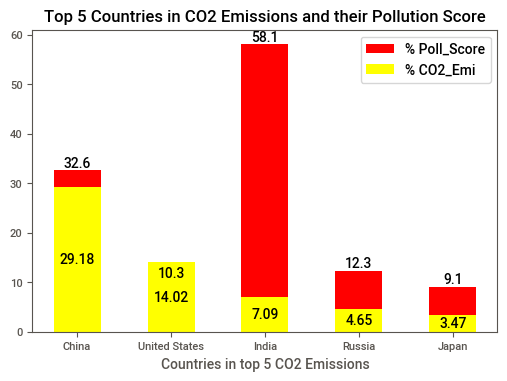

In [26]:
barWidth = .5

p1 = plt.bar(df_f["Country"], df_f["Poll_2021"], width=barWidth, color='red')
p2 = plt.bar(df_f["Country"], df_f["CO2_emis_2016"], width=barWidth, color='yellow')

#plt.ylabel('')
plt.xlabel('Countries in top 5 CO2 Emissions')
plt.title('Top 5 Countries in CO2 Emissions and their Pollution Score')
plt.legend((p1[0], p2[0]), ('% Poll_Score', '% CO2_Emi'))


plt.bar_label(p1)
plt.bar_label(p2, label_type='center')   
    
#display chart
plt.show()

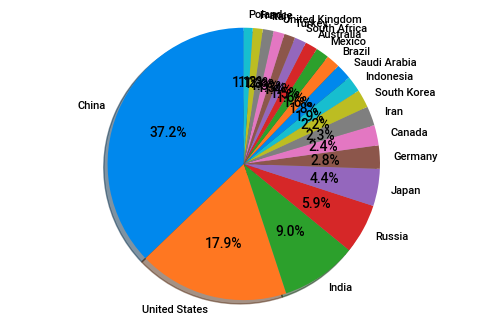

In [27]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(df_20["CO2_emis_2016"], labels= df_20["Country"] , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [32]:
import plotly.express as px

fig = px.pie(df_20, values='CO2_emis_2016', names='Country', title='CO2 Emission')
fig.show()

In [ ]:
# auto viz, klib 

### Most CO2 Emission Countries in percent share of world -Web Scraping
#### Data Cleaning  - Need to parse through the string and only select Country Name and percentage of CO2 Emission in Share of World

In [3]:
import requests
import bs4
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url1 = "https://www.worldometers.info/co2-emissions/co2-emissions-by-country/"
req = requests.get(url1).text
soup = BeautifulSoup(req, "html.parser")
results = soup.find('table').find_all("tr") # Parsing through the table, and selecting all table row
list_count = []
for i in range(0, len(results)):
    country = results[i].text
    list_count.append(country)
#word = list_count[1]
dict_list = {}
for i in range(1, len(list_count)):
    temp = list_count[i]
    name = temp[3:20]
    result = ''.join([x for x in name if not x.isdigit()])
    fin_wrd = (re.sub(r"[^a-zA-Z]+", ' ', result)).strip()
    per_share = float(temp[-7:-2].replace(" ", ""))
    dict_list[fin_wrd] = per_share

#len(list_count) # 210 Countries
dict_list
df1 = pd.DataFrame([dict_list])
em = df1.T #switch rows and col
new = em.reset_index()
per_co2 = new.rename(columns={0: "CO2_emis_2016", "index" :"Country"})
per_co2

,Country,CO2_emis_2016
0,China,29.18
1,United States,14.02
2,India,7.09
3,Russia,4.65
4,Japan,3.47
...,...,...
204,Anguilla,0.00
205,Saint Helena,0.00
206,Saint Pierre,0.00
207,Faeroe Islands,0.00


Current problems - need to clean and filter the data collected, only select the name and last percentage column from table

### Most Polluted Countries Web Scraping
#### Need to select country name and latest pollution percentages in respect to WHO guidelines

In [83]:
url2 = "https://www.iqair.com/us/world-most-polluted-countries"
req2 = requests.get(url2).text
soup1 = BeautifulSoup(req2, "html.parser")
results1 = soup1.find('table').find("tbody")   # Fing the tbody section 
test = results1.find_all("tr")               # Select all table rows from the table 
list_cn = []
for i in range(0, len(test)):
    country = test[i].text
    list_cn.append(country)
len(list_cn) # 117 countries
dic_poll = {}
for i in range(1, len(list_cn)):
    temp = list_cn[i]
    char = ''.join([x for x in temp if not x.isdigit()])
    country = (re.sub(r"[^a-zA-Z]+", ' ', char)).strip()
    nums = re.sub(r"[^0-9.]+", ' ', temp).strip()
    list_nums = nums.split()
    #latest_num = re.findall("\d+\.\d+", nums)
    if len(list_nums[1]) > 1 :
        dic_poll[country] = float(list_nums[1])
    elif list_nums[1] == ".":
        dic_poll[country] = 4.5
        
df1 = pd.DataFrame([dic_poll])
pol = df1.T #switch rows and col
new = pol.reset_index()
per_poll = new.rename(columns={0: "Poll_2021", "index" :"Country"})
per_poll.iloc[[88]]
per_poll.loc[88,['Country']] = "United States"
per_poll.iloc[88]
dic_poll

{'Chad': 75.9,
 'Pakistan': 66.8,
 'Tajikistan': 59.4,
 'India': 58.1,
 'Oman': 53.9,
 'Kyrgyzstan': 50.8,
 'Bahrain': 49.8,
 'Iraq': 49.7,
 'Nepal': 46.0,
 'Sudan': 44.1,
 'Uzbekistan': 42.8,
 'Qatar': 38.2,
 'Afghanistan': 37.5,
 'United Arab Emirates': 36.0,
 'Montenegro': 35.2,
 'Indonesia': 34.3,
 'Nigeria': 34.0,
 'Armenia': 33.9,
 'Mongolia': 33.1,
 'Saudi Arabia': 32.7,
 'China': 32.6,
 'Kazakhstan': 31.1,
 'Iran': 30.3,
 'Kuwait': 29.7,
 'Peru': 29.6,
 'Egypt': 29.1,
 'Bosnia Herzegovina': 27.8,
 'Uganda': 27.6,
 'Ghana': 25.9,
 'Myanmar': 25.9,
 'Lebanon': 25.7,
 'Serbia': 25.5,
 'North Macedonia': 25.4,
 'Croatia': 25.4,
 'Vietnam': 24.7,
 'Ethiopia': 23.9,
 'Syria': 23.0,
 'South Africa': 22.7,
 'Chile': 21.7,
 'Laos': 21.5,
 'Georgia': 21.0,
 'Madagascar': 21.0,
 'Turkmenistan': 20.4,
 'Thailand': 20.2,
 'Turkey': 20.0,
 'Algeria': 20.0,
 'Cambodia': 19.8,
 'Guatemala': 19.5,
 'Malaysia': 19.4,
 'Mexico': 19.3,
 'South Korea': 19.1,
 'Poland': 19.1,
 'Greece': 19.0,
 'Isra

## GDP Per Capita BY Country
https://www.worldometers.info/gdp/gdp-per-capita/#:~:text=Gross%20Domestic%20Product%20(GDP)%20per,the%20Nominal%20GDP%20per%20capita.


In [112]:
url3 = "https://www.worldometers.info/gdp/gdp-per-capita/#:~:text=Gross%20Domestic%20Product%20(GDP)%20per,the%20Nominal%20GDP%20per%20capita."
req3 = requests.get(url3).text
soup2 = BeautifulSoup(req3, 'html.parser')
results2 = soup2.find('table').find_all("tr") # Parsing through the table, and selecting all table row
list_ct = []
for i in range(0, len(results2)):
    cry = results2[i].text
    list_ct.append(cry)
list_ct

dict_l = {}
for i in range(1, len(list_ct)):
    temp = list_ct[i]
    ch = ''.join([x for x in temp if not x.isdigit()])
    country = (re.sub(r"[^a-zA-Z]+", ' ', ch)).strip()
    n = ''.join([x for x in temp if not x.isalpha()])
    list_nums = n.split()
    num = list_nums[1]
    cntry = country.replace(" N A N A", "")
    if len(num) >= 3:
        nu = float(num.replace("$", '').replace(',', '')) 
    dict_l[cntry] = nu
        

df1 = pd.DataFrame([dict_l])
pol = df1.T #switch rows and col
indqw = pol.reset_index()
gdp = indqw.rename(columns={0: "GDP_Per_Cap", "index" :"Country"})
gdp

,Country,GDP_Per_Cap
0,Qatar,128647.0
1,Macao,115367.0
2,Luxembourg,107641.0
3,Singapore,94105.0
4,Brunei,79003.0
...,...,...
185,American Samoa,727.0
186,Northern Mariana Islands,727.0
187,Andorra,727.0
188,Guam,727.0


### Combining two dataframes into one and into CSV file - merged them based on country name

In [114]:
all_col = pd.merge(per_co2, per_poll, on="Country")
alcnt = pd.merge(all_col,gdp,  on = "Country")
alcnt.to_csv('cntryinfo.csv', index=False)
alcnt_col.head()

,Country,CO2_emis_2016,Poll_2021
0,China,29.18,32.6
1,United States,14.02,10.3
2,India,7.09,58.1
3,Russia,4.65,12.3
4,Japan,3.47,9.1


In [7]:
argd = all_col.sort_values(by =  "CO2_emis_2016", ascending = False)
argd = argd.head(5)

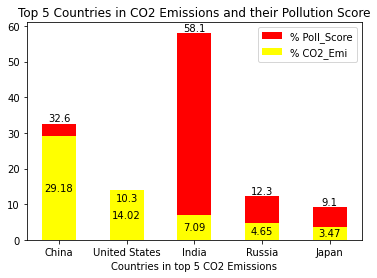

In [8]:
barWidth = .5

p1 = plt.bar(argd["Country"], argd["Poll_2021"], width=barWidth, color='red')
p2 = plt.bar(argd["Country"], argd["CO2_emis_2016"], width=barWidth, color='yellow')

#plt.ylabel('')
plt.xlabel('Countries in top 5 CO2 Emissions')
plt.title('Top 5 Countries in CO2 Emissions and their Pollution Score')
plt.legend((p1[0], p2[0]), ('% Poll_Score', '% CO2_Emi'))


plt.bar_label(p1)
plt.bar_label(p2, label_type='center')   
    
#display chart
plt.show()